In [1]:
# Standard Data Science Utility Belt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# User defined methods
#from wrangle import wrangle, wrangle_explore
from acquire import acquire,team_data_list
from prepare import prep
import model
#from functions import get_data_dictionary

# Stats
from scipy.stats import mannwhitneyu, wilcoxon
from scipy.stats import levene

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Viewing Options
pd.set_option("display.max_rows", None, "display.max_columns", None) 
pd.reset_option("display.max_rows", "display.max_columns")

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Project Planning

### Project and Goals

        Create a machine learning model that can accuratly predict the win/loss outcome of a professional League of Legends match by the 20 minute mark.

### Original Hypothesis

    The biggest driver for predicting win rates will be the data on 'TeamWards'.

### Domain Knowledge Quick Tip


    League of Legends is a multiplayer online battle arena (MOBA) game in which the player controls a character ("champion") with a set of unique abilities from an isometric perspective.  As of April 2021, there are 155 champions available to play. Over the course of a match, champions gain levels by accruing experience points (XP) through killing enemies. Items also increase champions' strength, and are bought with gold, which players accrue passively over time and earn actively by defeating the opposing team's minions, champions, or defensive structures. In the main game mode, Summoner's Rift, items are purchased through a shop menu available to players only when their champion is in the team's base. Each match is discrete; levels and items do not transfer from one match to another.

### The Plan

    Setup the environment, create a new repository, update the .gitignore, create a README.md with the data and common termonology dictionaries, create a trello board, come up with an original hypothesis and setup a morning standup living document.
    
    Acquire the data using the riot API.
    
    Clean the data, drop any useless features, remove duplicate observations, double check data-types, find any null values, decide what do with null values, and encode the features.
    
    Split the Data, into three data sets named train and test.
    
    Explore the data, look through the graphs and evaluate each feature to find drivers of predicting win rates.  Exploration will also include two hypotheses, setting of alpha, statistical tests, rejecting or failing to reject the null hypothesis, and documentation of the findings and takeaways.
    
    Create Models, create three machine learning models plus a baseline model.  Will be using a DecisionTreeClassifier, RandomForestClassifier, and KNeighborsClassifier.  Evaluate models on train and validate datasets.  Pick the model with highest validate accuracy to run on my final test data.
    
    Wrap it up, document conclusions, recommendations, and take aways in the final report notebook.  Create a presentation. 

# Executive Summary - Conclusions & Next Steps

### Conclusion

    Our random forest classifier model accuracy average using cross validation was roughly 97% beating our baseline accuracy by 42%.
    
    Our model confirmed that our original hypothesis of 'TeamWards' being the biggest driver of win rates was incorrect.  Our models feature importance concluded that 'towers_lost' was the biggest driver in predicting win rates. 
    
    Our model identified the most important features as:
        
        'towers_lost_'
        'inhibs_lost_team200'
        'baron_team100'
        'dragon_team100'
        'team_totalGold_100'
        'team_xp_100'
        
    If we had more time we would have liked to:
    
        - run our model on non-pro games & see if 'towers_lost' is still the biggest driver for predicting win rates
        - dive deeper into what are the drivers for gaining towers
        - engineer more features
        - predict a winner at a much earlier time than 20 min into a game
        

### Recommendations

    The data suggests:  
    
    - If you are a coach, revolving your team stragety around objectives can lead to more wins. 
    
    - If you are player, encouraging memebers of ones team to work around objectives can lead to more wins. 

### Key Takeaways

    We used event data from the Riot API to calcuate what the value of each oberservation was at the 20 min marker.
    
    The only 'gameType' used was "classic".  Which means all the data is from the most popular game mode and on the same map.

    Games were pulled from various game patches to include:

        '11.10.376.4811'
        '11.11.377.6311'
        '11.12.379.4946'
        '11.13.382.1241'
        '11.14.384.6677'
        '11.14.385.9967'
        '11.15.388.2387'
        '11.15.389.2308'
        '11.16.390.1945'
        '11.17.393.607'
        '11.17.394.4489'
        '11.18.395.7538'
        '11.19.398.2521'
        '11.19.398.9466'
        '11.20.400.7328'
        '11.21.403.3002'
        '11.22.406.3587'
        '11.23.409.111'

# Data Acquisition (Jared)

In [2]:
df = acquire()

In [4]:
### .info(), .head(), .describe()
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8773 entries, 0 to 8772
Data columns (total 208 columns):
 #    Column                                  Dtype  
---   ------                                  -----  
 0    assistsplayer_1                         float64
 1    assistsplayer_10                        float64
 2    assistsplayer_2                         float64
 3    assistsplayer_3                         float64
 4    assistsplayer_4                         float64
 5    assistsplayer_5                         float64
 6    assistsplayer_6                         float64
 7    assistsplayer_7                         float64
 8    assistsplayer_8                         float64
 9    assistsplayer_9                         float64
 10   baron_team100                           float64
 11   baron_team200                           float64
 12   currentGold_1                           float64
 13   currentGold_10                          float64
 14   currentGold_2         

In [5]:
df.head()

,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,baron_team100,baron_team200,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_10,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_7,deathsplayer_8,deathsplayer_9,dragon_team100,dragon_team200,gameMode,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,inhibs_lost_team200,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_7,killsplayer_8,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,riftherald_team200,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,inhibs_lost_team100,killsplayer_6,killsplayer_9,riftherald_team100,ward_player_0,killsplayer_0,riftherald_team300,team_deathsplayer_100,team_deathsplayer_200,team_goldPerSecond_100,team_goldPerSecond_200,team_jungleMinionsKilled_100,team_jungleMinionsKilled_200,team_killsplayer_100,team_killsplayer_200,team_level_100,team_level_200,team_magicDamageDoneToChampions_100,team_magicDamageDoneToChampions_200,team_minionsKilled_100,team_minionsKilled_200,team_physicalDamageDoneToChampions_100,team_physicalDamageDoneToChampions_200,team_timeEnemySpentControlled_100,team_timeEnemySpentControlled_200,team_totalDamageDoneToChampions_100,team_totalDamageDoneToChampions_200,team_totalGold_100,team_totalGold_200,team_trueDamageDoneToChampions_100,team_trueDamageDoneToChampions_200,team_ward_player_100,team_ward_player_200,team_assistsplayer_100,team_assi

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
assistsplayer_1,8773.0,2.926707,2.292951,0.0,1.0,2.0,4.0,30.0
assistsplayer_10,8773.0,7.388693,3.770680,0.0,5.0,7.0,10.0,26.0
assistsplayer_2,8773.0,4.654508,2.776600,0.0,3.0,4.0,6.0,21.0
assistsplayer_3,8773.0,3.624758,2.536076,0.0,2.0,3.0,5.0,22.0
assistsplayer_4,8773.0,4.034082,2.577455,0.0,2.0,4.0,6.0,18.0
...,...,...,...,...,...,...,...,...
team_ward_player_200,8773.0,87.601847,68.213945,0.0,53.0,69.0,95.0,929.0
team_assistsplayer_100,8773.0,22.488544,9.592068,1.0,16.0,21.0,28.0,78.0
team_assistsplayer_200,8773.0,22.734070,9.319227,0.0,16.0,22.0,29.0,68.0
team_xp_100,8773.0,41287.743645,2965.413583,28840.0,39215.0,41170.0,43274.0,52169.0


### Distribution - "Team Data Stats"

    We will only be graphing team data stats for 'blue team' due to the amount of features in the this df.  
    
    These features are:
    
         'riftherald_team100',
         'inhibs_lost_team100',
         'team_totalGold_100',
         'team_trueDamageDoneToChampions_100',
         'team_ward_player_100',
         'team_assistsplayer_100',
         'team_xp_100',
         'team_deathsplayer_100',
         'team_jungleMinionsKilled_100',
         'team_killsplayer_100',
         'team_level_100',
         'team_magicDamageDoneToChampions_100',
         'team_minionsKilled_100',
         'team_physicalDamageDoneToChampions_100',
         'team_timeEnemySpentControlled_100']

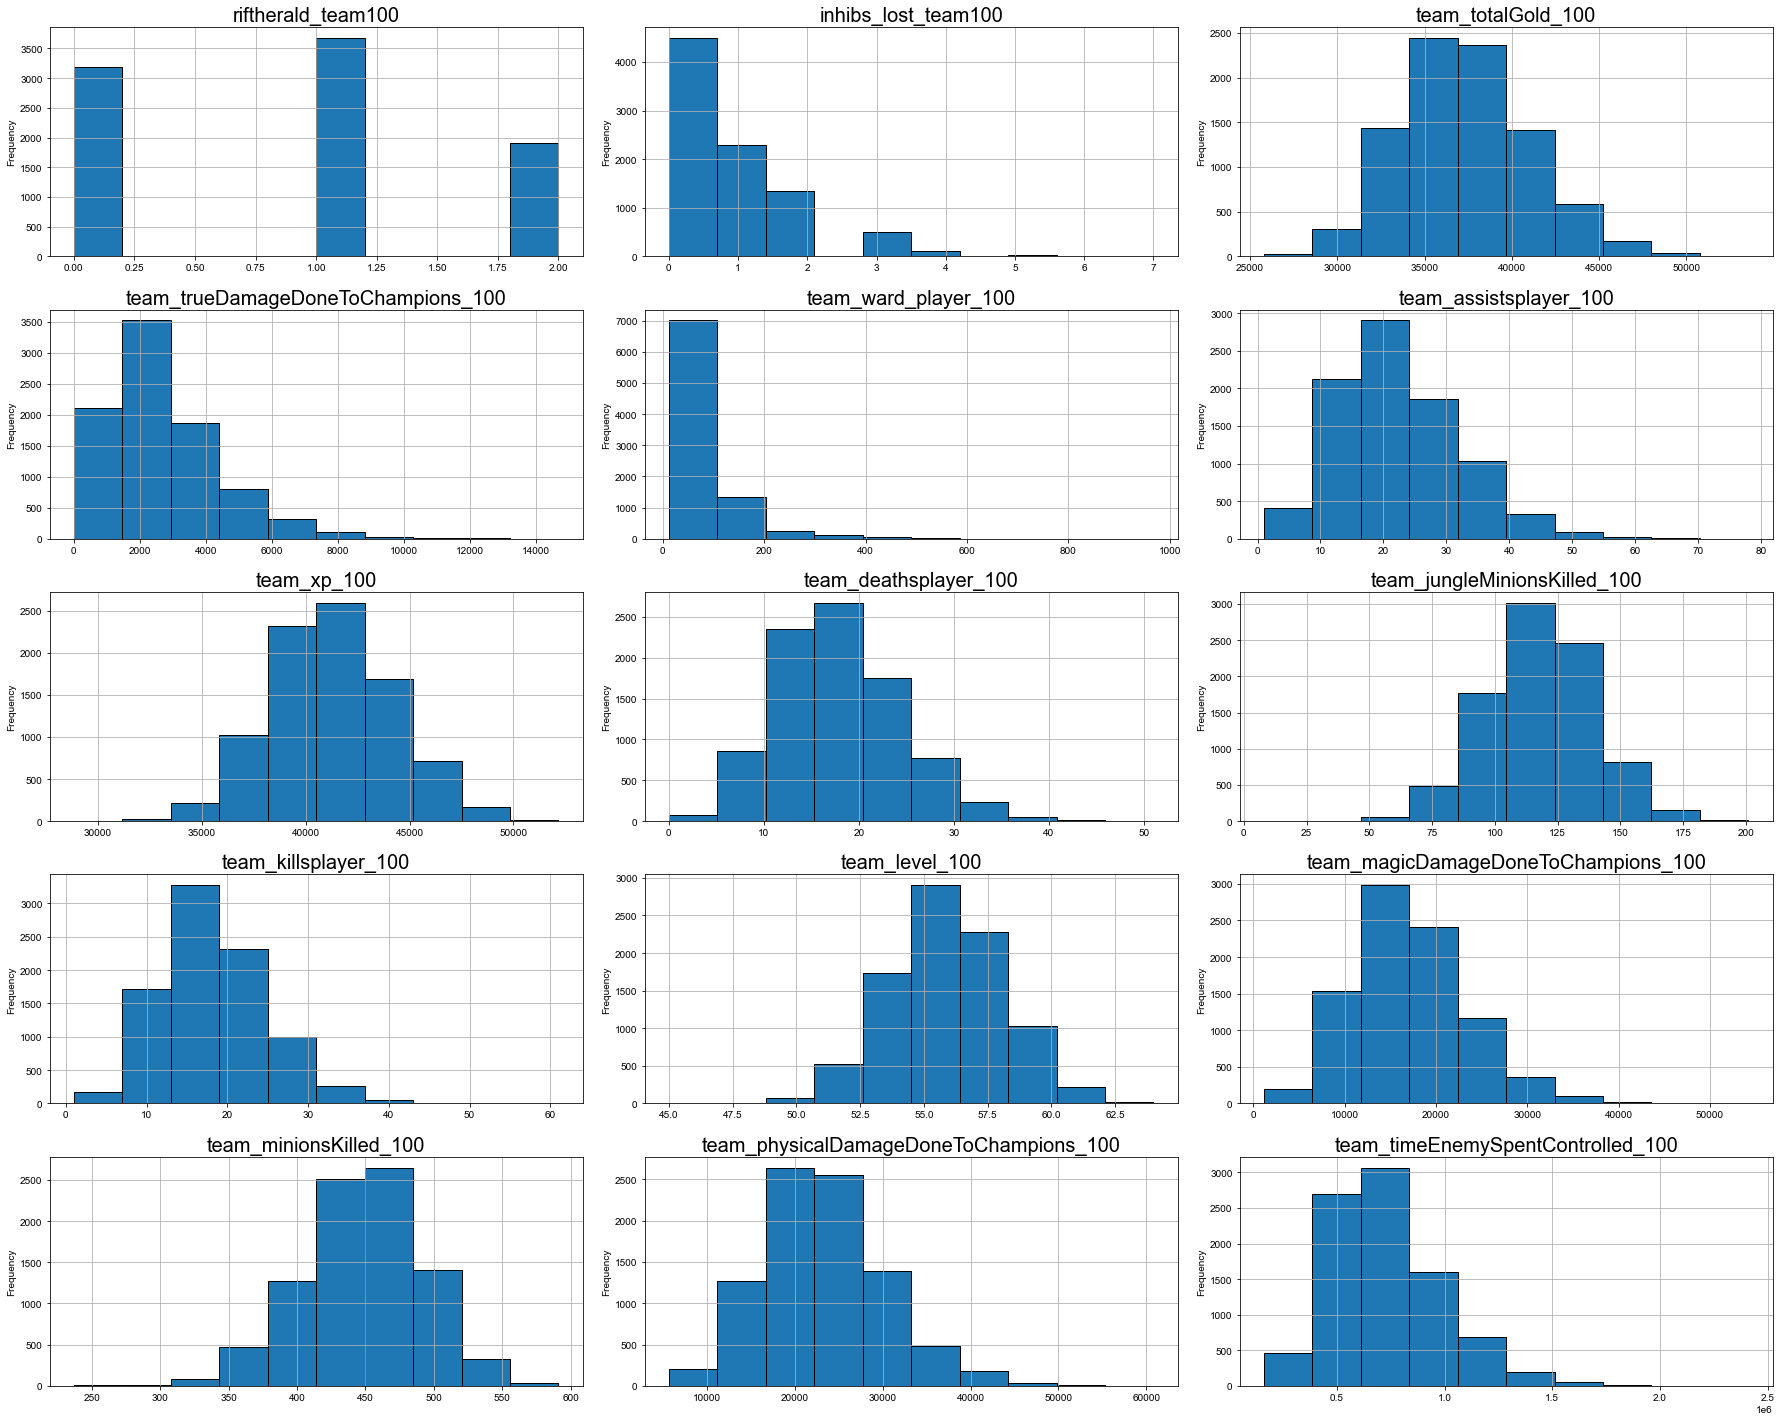

In [8]:
# data distributions for blue team.
fig, axs = plt.subplots(5,3, sharey = False, figsize = (25,20))
axe = axs.ravel()
sns.set(font_scale = 1.25)
for i,col in enumerate(team_data_list):
    p = df[col].plot.hist(ax = axe[i],title = col, ec = 'black',bins = 10)
    p.set_title(col,fontsize = 20)
    plt.tight_layout()

### Data Dictionary
| Feature                    | Datatype                | Definition   |
|:----------------------|:------------------------|:-------------|
| RedTeamKills|int64|Gives a total of the red teams kills.|
| BlueTeamKills|int64|Gives a total of the blue teams kills|
| RedTeamTowerKills|int64|Gives a total of the number of towers taken by the red team|
| BlueTeamTowerKills|int64|Gives a total of the number of towers taken by the blue team|
| RedTeamTowerAssists|int64|Gives the total number of assists on the red team|
| BlueTeamTowerAssists|int64|Gives the total number of assists on the blue team|
| RedTeamAvgLvl|int64|Takes the mean level of all the players on the red team|
| BlueTeamAvgLvl|int64|Takes the mean level of all the players on the blue team|
| RedTeamGoldSpent|int64|Gives a total amount of gold spent by the red team|
| BlueTeamGoldSpent|int64|Gives a total amount of gold spent by the blue team|
| RedTeamDragons|int64|Gives a total number of dragons killed by the red team|
| BlueTeamDragons|int64|Gives a total number of dragons killed by the blue team|
| RedTeamHeralds|int64|Gives a total number of heralds killed by the red team|
| BlueTeamHeralds|int64|Gives a total number of heralds killed by the blue team|
| RedTeamBarons|int64|Gives a total number of barons killed by the red team|
| BlueTeamBarons|int64|Gives a total number of barons killed by the blue team|
| RedTeamInhibTaken|int64|Gives a total number of inhibitors taken by the red team|
| BlueTeamInhibTaken|int64|Gives a total number of inhibitors taken by the blue team|

## Target Feature - 'winningTeam

    Riot API's code convention
    
        BlueTeam = 100.0
    
        RedTeam = 200.0

In [9]:
# Target feature was engineered from total.Cup.Points
df['winningTeam'].value_counts()

200.0    4524
100.0    4249
Name: winningTeam, dtype: int64

### Target Distribution

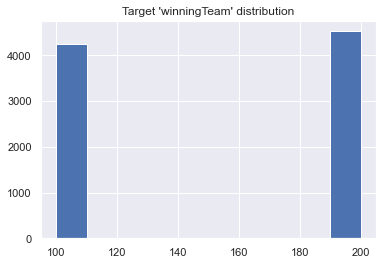

In [10]:
# Graphing the Distribution
sns.set(font_scale = 1)
df.winningTeam.hist()
plt.title("Target 'winningTeam' distribution")
plt.show()

### Acquire takeaway

    Summoner names were webscraped from popular sites:
    
        https://na.op.gg/ranking/ladder/
        https://www.trackingthepros.com/players/na/
        
    Only selected the data from the top 3000 playes in the North American server.
    
    Includes only skill levels of: 
    
        - masters
        - grandmasters
        - challenger
        - professionals
    
    Riot api was used to get puuid numbers from players.
    
    Puuid numbers are used to get match lists from the players match histories.
    
    The match lists of games that were longer than 20 min were used to get json files that were prepared into the nice tidy dataframe.

# Prepare

#### Dropped Columns

    The following column got dropped because it didn't offer any value:
    
        - killsplayer_0

    It represents how many kills were made by game objects, not players, and contains several null values.

#### Handle Nulls
    
    Filled in all missing values with a 0. 
    
    Nans were given when a player didn't have any value for any particular feature.  

#### Convert Data Types

    No data types were converted

#### Rename

    Changed the following columns names to something with more readability: 
    
    BlueTeam
    
        - deathsplayer_100 -> BlueTeamDeaths
        
        - goldPerSecond_100 -> BlueTeamGoldPerSecond
        
        - jungleMinionsKilled_100 -> BlueTeamJungleMinionsKilled
        
        - killsplayer_100 -> BlueTeamKills
        
        - level_100 -> BlueTeamLevel
        
        - magicDamageDoneToChampions100 -> BlueTeamMagicDamageDoneToChampions
        
        - minionsKilled_100 -> BlueTeamMinionsKilled
        
        - physicalDamageDoneToChampions_100 -> BlueTeamPhysicalDamageDoneToChampions
        
        - timeEnemySpentControlled_100 -> BlueTeamTimeEnemySpentControlled
        
        - totalDamageDoneToChampions_100 -> BlueTeamTotalDamageDoneToChampions
        
        - totalGold_100 -> BlueTeamTotalGold
        
        - trueDamageDoneToChampions_100 -> BlueTeamTrueDamageDoneToChampions
        
        - ward_player_100 -> BlueTeamWard_player
        
        - assistsplayer_100 -> BlueTeamAssistsplayer
        
        - xp_100 -> BlueTeamXP
        
        
    RedTeam
    
        - deathsplayer_200 -> RedTeamDeaths
        
        - goldPerSecond_200 -> RedTeamGoldPerSecond
        
        - jungleMinionsKilled_200 -> RedTeamJungleMinionsKilled
        
        - killsplayer_200 -> RedTeamKills
        
        - level_200 -> RedTeamLevel
        
        - magicDamageDoneToChampions200 -> RedTeamMagicDamageDoneToChampions
        
        - minionsKilled_200 -> RedTeamMinionsKilled
        
        - physicalDamageDoneToChampions_200 -> RedTeamPhysicalDamageDoneToChampions
        
        - timeEnemySpentControlled_200 -> RedTeamTimeEnemySpentControlled
        
        - totalDamageDoneToChampions_200 -> RedTeamTotalDamageDoneToChampions
        
        - totalGold_200 -> RedTeamTotalGold
        
        - trueDamageDoneToChampions_200 -> RedTeamTrueDamageDoneToChampions
        
        - ward_player_200 -> RedTeamWard_player
        
        - assistsplayer_200 -> RedTeamAssistsplayer
        
        - xp_200 -> RedTeamXP

#### Engineered Features

    - BlueTeamTotalGoldDifference = BlueTeamTotalGold - RedTeamTotalGold
    
    - RedTeamTotalGoldDifference = RedTeamTotalGold - BlueTeamTotalGold
    
    - BlueTeamMVPKills = Blue teams highest individual kill count 
    
    - RedTeamMVPKills = Red teams highest individual kill count 

#### Removed Outliers
    
    No outliers were removed.

#### Scaling
    No scaling was done.

#### Encode

    Created dummy columns for:
    
        - gameVersion
        

#### Split

    Split data into three data frames:
    
        - train
        - test
        
    Used a random_state of 123

### Prepare Takeaway
    
    - All features and observations have no null or empty values.
    
    - Most of the data was already prepped the way we needed it because we pulled the data off of JSON files ourselves.

# Exploration

In [21]:
# Using wrangle_explore because the values wont be scaled or encoded
train, test = prep(acquire())

### Original Hypothesis

    The biggest driver for predicting win rates will be the data on 'TeamWards'.

### Questions
    
    Ward score affects the outcome?
    
    Assists affects the outcome?
    
    Damage by magic affects the outcome?
    
    Towers lost affect the outcome?
    
    XP gained affects the outcome?
    
    Number of inhibitors lost affects the outcome?
    
    Team dragon kills affects the outcome of the game?

# Exploration

## What key drivers effect the outcome of winning a match?

### Question 1
- Is there a correlation between Blue team losing thier tower or red team losing thier tower and the outcome of the game

# univariate study

In [24]:
univariate_study = ['towers_lost_team100','towers_lost_team200']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

NameError: name 'explore_univariate' is not defined

    Blue team lost on average 5 towers and Red team lost on average 5 towers as well
    
    Both teams towers lost look to be evenly distributed

# Man Whitney U

# Stats
from scipy.stats import mannwhitneyu, wilcoxon
from scipy.stats import levene

In [25]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df.towers_lost_team100, df.towers_lost_team200)
print(stats, p)
alpha = .05
if p < alpha:
    print("blue and red populations do not have equal variances")
else:
    print("blue and red populations do have equal variances")

NameError: name 'df' is not defined

## $H_0$: Red team that loses less then 5 towers will not give the blue team victory

## $H_a$: Red team that loses more then 5 towers will give the blue team the victory

# Hypothesis Testing

In [26]:
null_hypothesis = "Red team towers lost < 5 has no difference in the outcome of the game"
alternative_hypothesis = "Red team towers lost > 5 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_loss = train[train.towers_lost_team200 > 5]
little_loss = train[train.towers_lost_team200 <= 5]
t, p = stats.ttest_ind(big_loss.winningTeam, little_loss.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

NameError: name 'stats' is not defined

### Hypothesis Results:

    There is a difference when the red team loses 5 or more towers that will give the blue team the victory

### Takeaways

    I have a 95% confidence level that there is a difference in outcome when red team loses 5 or more towers
    Red and blue team towers lost averages are almost identical
    Red or blue towers lost could be useful in the modeling phase

### Question 2
    Is there a correlation between Blue team xp, red team xp and the outcome of the game

# Univariate Study

In [ ]:
univariate_study = ['BlueTeamXp','RedTeamXp']

for i in univariate_study:
    explore_univariate(train, i)
    print(f'Summary Statistics for {i}\n{train[i].describe()}')

    Blue team averaged 41,253 xp and Red team averaged 41,593 xp
    Both teams xp's are normally distributed

# Man Whitney U

In [ ]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df.BlueTeamXp, df.RedTeamXp)
print(stats, p)
alpha = .05
if p < alpha:
    print("blue and red populations do not have equal variances")
else:
    print("blue and red populations do have equal variances")

# Hypothesis Testing

In [28]:
null_hypothesis = "Red team xp that is > 41,000 will not lead to a blue team win"
alternative_hypothesis = "Red team xp that is < 41,000 will lead to a blue team win"
a = 0.05 #a for alpha 

big_xp = train[train.RedTeamXp > 41_000]
little_xp = train[train.RedTeamXp <= 41_000]
t, p = stats.ttest_ind(big_xp.winningTeam, little_xp.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

NameError: name 'stats' is not defined

### Hypothesis Results:
    There is a difference when the red team has more then 41k xp vs less then 41k xp that could lead to a blue team win

### Takeaways

    I have a 95% confidence level that there is a difference in outcome when red team has more then 41k xp
    Red and blue team xp means are almost the same
    Red or blue xp could be useful in the modeling phase

# Bivariate

## Physical Damage

Damage by blue and outcome


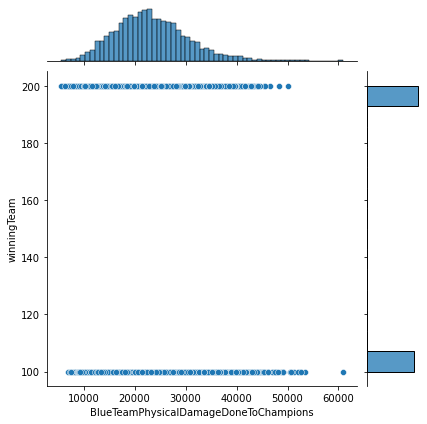

In [29]:
#winningTeam across physical damage to champions for blue team
print('Damage by blue and outcome')
sns.jointplot(x='BlueTeamPhysicalDamageDoneToChampions', y='winningTeam', data=train)
plt.xlabel('Damage')
plt.ylabel('Winning Team')
plt.show()

### Ho: Blue team total physical damage over 20k will not be significant for the outcome of the game

### Ha: Blue team total physical damage less then or equal 20k will be significant for the outcome of the game

# Hypothesis Testing

In [ ]:
null_hypothesis = "BlueTeamPhysicalDamageDoneToChampions > 20,000 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamPhysicalDamageDoneToChampions < 20,000 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_damage = train[train.BlueTeamPhysicalDamageDoneToChampions > 20_000]
little_damage = train[train.BlueTeamPhysicalDamageDoneToChampions <= 20_000]
t, p = stats.ttest_ind(big_damage.winningTeam, little_damage.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

    Team damage over 20k does not effect the outcome of the game

## Team Level 

Team level blue and outcome


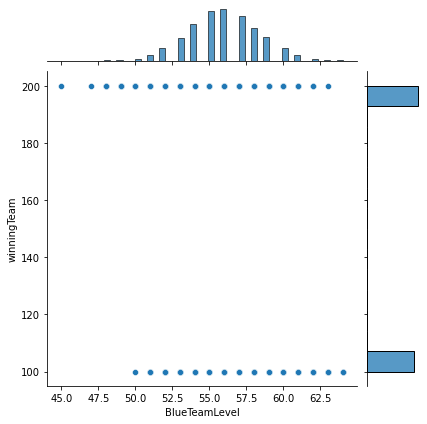

In [31]:
#winningTeam across team level for blue team
print('Team level blue and outcome')
sns.jointplot(x='BlueTeamLevel', y='winningTeam', data=train)
plt.xlabel('Team Level')
plt.ylabel('Winning Team')
plt.show()

### Ho: Average Blue team level of less then 55  will not be significant for the outcome of the game

### Ha: Average Blue team level of 55 and over will be significant for the outcome of the game

# Hypothesis Testing

In [32]:
null_hypothesis = "BlueTeamLevel < 55 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamLevel > 55 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_level = train[train.BlueTeamLevel > 55]
little_level = train[train.BlueTeamLevel <= 55]
t, p = stats.ttest_ind(big_level.winningTeam, little_level.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

NameError: name 'stats' is not defined

    A team who has an average level of 55 and over has significant effect on the game

## Wards

Team ward blue and outcome


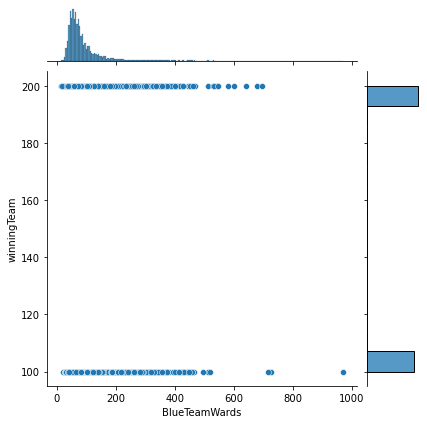

In [33]:
#winningTeam across team ward for blue team
print('Team ward blue and outcome')
sns.jointplot(x='BlueTeamWards', y='winningTeam', data=train)
plt.xlabel('Team Ward')
plt.ylabel('Winning Team')
plt.show()

## Ho: Blue team wards less then 88 will not make a difference in the outcome of the game

## Ha: Blue team wards greater then 88 will make a difference in the outcome of the game

# Hypothesis Testing

In [34]:
null_hypothesis = "BlueTeamWards < 88 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamWards > 88 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_ward = train[train.BlueTeamWards > 88]
little_ward = train[train.BlueTeamAssists > 22]
t, p = stats.ttest_ind(big_ward.winningTeam, little_ward.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

NameError: name 'stats' is not defined

## Team Assists

Team assists blue and outcome


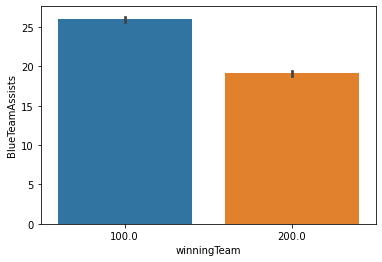

In [35]:
#winningTeam across team assists for blue team
print('Team assists blue and outcome')
sns.barplot(x='winningTeam', y='BlueTeamAssists', data=train)
plt.xlabel('winningTeam')
plt.ylabel('BlueTeamAssists')
plt.show()

## Ho: Blue team with assists under 22 will not have a difference in the outcome of the game

## Ha: Blue team with assists over 22 will have a difference in the outcome of the game

# Hypothesis Testing

In [36]:
null_hypothesis = "BlueTeamAssists < 22 has no difference in the outcome of the game"
alternative_hypothesis = "BlueTeamAssists > 22 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_assists = train[train.BlueTeamAssists > 22]
little_assists = train[train.BlueTeamAssists <= 22]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

NameError: name 'stats' is not defined

## Towers 

Team towers taken and outcome


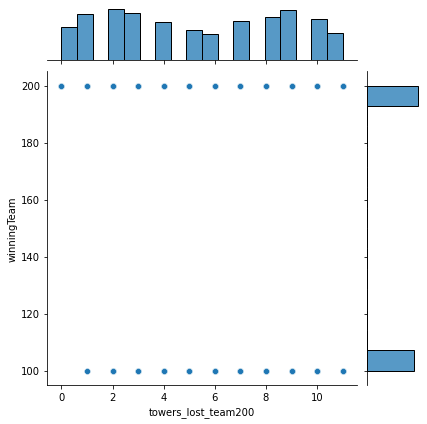

In [38]:
#winningTeam across towers taken for blue team
print('Team towers taken and outcome')
sns.jointplot(x='towers_lost_team200', y='winningTeam', data=train)
plt.xlabel('Towers taken by Blue')
plt.ylabel('Winning Team')
plt.show()

## Ho: Red team that loses less then 5 towers will not have a difference in the outcome of the game

## Ha: Red team that loses more then 5 towers will have a difference in the outcome of the game

# Hypothesis Testing

In [40]:
null_hypothesis = "Red team towers lost < 5 has no difference in the outcome of the game"
alternative_hypothesis = "Red team towers lost > 5 has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_loss = train[train.towers_lost_team200 > 5]
little_loss = train[train.towers_lost_team200 <= 5]
t, p = stats.ttest_ind(big_loss.winningTeam, little_loss.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

NameError: name 'stats' is not defined

Team dragons taken and outcome


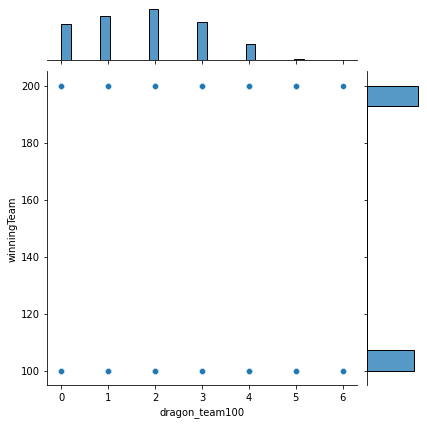

In [41]:
#winningTeam and dragon taken for blue team
print('Team dragons taken and outcome')
sns.jointplot(x='dragon_team100', y='winningTeam', data=train)
plt.xlabel('Towers taken by Blue')
plt.ylabel('Winning Team')
plt.show()

# Hypothesis Testing

In [42]:
null_hypothesis = "Blue team takes < 2 dragons has no difference in the outcome of the game"
alternative_hypothesis = "Blue team takes > 2 dragons has a difference in the outcome of the game"
a = 0.05 #a for alpha 

big_gain = train[train.dragon_team100 > 2]
little_gain = train[train.dragon_team100 <= 2]
t, p = stats.ttest_ind(big_gain.winningTeam, little_gain.winningTeam)
print(p)
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

NameError: name 'stats' is not defined

## Multivariate 

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='dragon_team100',y='BlueTeamAssists',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue Dragons Taken and Blue Assists based on winning team', fontsize = 20)
plt.show()

big_assists = train[train.dragon_team100 > 0]
little_assists = train[train.BlueTeamAssists > 0]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)

    Blue team more then likely to win if the assist were above 30 and 2 or more dragons killed

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='towers_lost_team200',y='BlueTeamWards',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue Towers Taken and Blue Wards based on winning team', fontsize = 20)
plt.show()

In [ ]:
big_assists = train[train.towers_lost_team200 > 0]
little_assists = train[train.BlueTeamWards > 0]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)

    Wards may have a minor role, however the number of towers blue team won atleast 4 or more is a key factor in the outcome

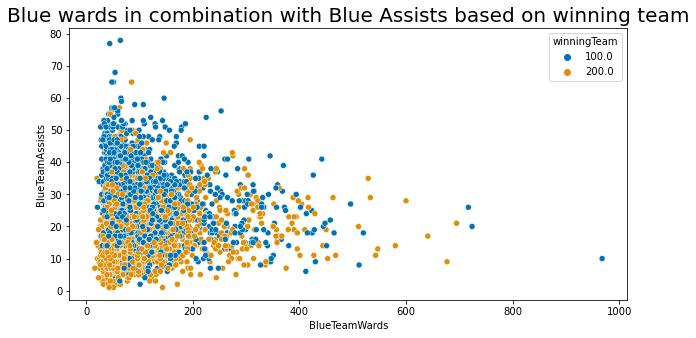

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='BlueTeamWards',y='BlueTeamAssists',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue wards in combination with Blue Assists based on winning team', fontsize = 20)
plt.show()

In [44]:
big_assists = train[train.BlueTeamWards > 1]
little_assists = train[train.BlueTeamAssists > 22]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)
plt.figure(figsize=(10,5))
sns.scatterplot(x='towers_lost_team200',y='RedTeamTrueDamageDoneToChampions',data=train,hue='winningTeam', palette='colorblind')
plt.title('Red lost towers vs Red damage based on winning team', fontsize = 20)
plt.show()

NameError: name 'stats' is not defined

In [45]:
big_assists = train[train.towers_lost_team200 > 0]
little_assists = train[train.RedTeamTrueDamageDoneToChampions > 0]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)

NameError: name 'stats' is not defined

    Losing towers to blue team is more important then total damage by red team

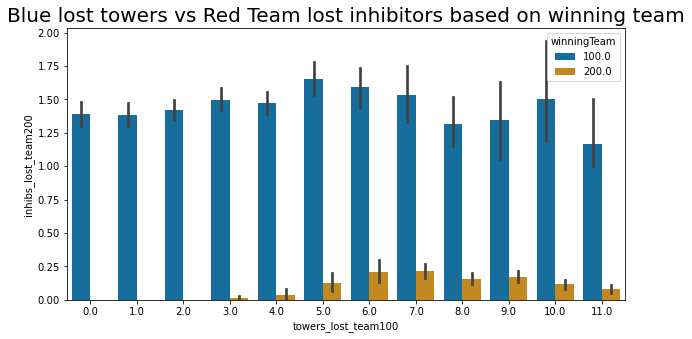

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x='towers_lost_team100',y='inhibs_lost_team200',data=train,hue='winningTeam', palette='colorblind')
plt.title('Blue lost towers vs Red Team lost inhibitors based on winning team', fontsize = 20)
plt.show()

In [47]:
big_assists = train[train.towers_lost_team100 > 0]
little_assists = train[train.inhibs_lost_team200 > 0]
t, p = stats.ttest_ind(big_assists.winningTeam, little_assists.winningTeam)
print(p)

NameError: name 'stats' is not defined

# Exploration Take Away

    - Features I am predicting to do reasonably well in my model.  I will try them in the modeling stage and document the process.
    
        'Assists'
        'Barons'
        'Inhibitors'
        'Towers'

# Modeling


    - Create a baseline
    - Split the data into X and y groups
    - No need for validate, using cross-validation in place of
    - Build RandomForestClassifier models
    - Evaluate the best one to use on our the test dataset.

In [8]:
train, test = prep(acquire())

### Create a Baseline

    Since this is a classification problem, we will set the baseline to whichever team has the most wins in our training set.

In [14]:
# Which team has the most wins? Team 200.0
y_train.value_counts()

200.0    3649
100.0    3369
Name: winningTeam, dtype: int64

In [15]:
# The following function call creates the baseline, returns the model, and prints the accuracy
baseline_model = model.baseline_acc(X_train, y_train)

Baseline accuracy score is: 51.995%


### Split Into X and y Groups

In [9]:
#X group = features, y group = target
X_train, y_train = train.drop(columns = ['winningTeam']), train.winningTeam

In [11]:
#X group = features, y group = target
X_test, y_test = train.drop(columns = ['winningTeam']), test.winningTeam

In [12]:
#Verify they are the same length
X_train.shape, y_train.shape

((7018, 226), (7018,))

### Create Train and Test Sets

    We will not need a validate dataset since we are utilizing cross-validation. The following line of code will set aside 20% of the data for testing.

In [13]:
train.shape, test.shape

((7018, 227), (1755, 227))

### Random Forest Classifier

    To use the function we wrote, you must first create a dicitonary keyed with hyperparameters and a range of values for each. It will be used to find and return an optimized Random Forest Classifier model.

In [16]:
#Create the dictionary of hyperparameters we want to optimize across
param_dict = {
    'max_depth': range(1, 16),
    'min_samples_leaf': range(1, 16)
}

In [17]:
#The following function call will find and return an optimized Random Forest Classifier
#and print out that model's mean cross-validated accuracy and its hyperparameters.
best_model = model.get_random_forest_models(X_train, y_train, param_dict)

Mean Cross-Validated Accuracy:  0.9665
Max Depth:  10
Min Samples Per Leaf:  1


__Best Model Takeaways__

    - Random Forest Classifier
    - Mean Cross-Validated Accuracy: 96.64%
    - Outperformed Baseline by 42%
    - Max Depth: 8
    - Minimum Samples Per Leaf: 3

__Top 10 Features__

In [18]:
best_features = pd.DataFrame(best_model.feature_importances_, X_train.columns)
best_features.sort_values(by = 0, ascending = False).head(10)

,0
towers_lost_team200,0.130038
towers_lost_team100,0.108488
inhibs_lost_team100,0.103690
inhibs_lost_team200,0.100154
RedTeamTotalGoldDifference,0.063801
BlueTeamTotalGoldDifference,0.039338
baron_team100,0.038704
baron_team200,0.034678
RedTeamTotalGold,0.026388
dragon_team200,0.023356


# Evaluation

    - Refit on train data before using it on the test data. 
    
    - This needs to be done because cross-validation fits models on a small subset of the given data which means that our best model has only been trained on a fraction of the actual training data set.

__Fit Best Model on All Train Data__

In [23]:
#The following line of code will fit our best model to all of the training data
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

__Evaluate On Test__

In [ ]:
#The following code will score our best model on the unseen test data

#Remove this comment and uncomment the following line of code only when ready for testing!

#best_model.score(X_test, y_test)

### Conclusion

    Our random forest classifier model accuracy average using cross validation was roughly 97% beating our baseline accuracy by 42%.
    
    Our model confirmed that our original hypothesis of 'TeamWards' being the biggest driver of win rates was incorrect.  Our models feature importance concluded that 'towers_lost' was the biggest driver in predicting win rates. 
    
    Our model identified the most important features as:
        
        'towers_lost_'
        'inhibs_lost_team200'
        'baron_team100'
        'dragon_team100'
        'team_totalGold_100'
        'team_xp_100'
        
    If we had more time we would have liked to:
    
        - run our model on non-pro games & see if 'towers_lost' is still the biggest driver for predicting win rates
        - dive deeper into what are the drivers for gaining towers
        - engineer more features
        - predict a winner at a much earlier time than 20 min into a game
        

### Recommendations

    The data suggests:  
    
    - If you are a coach, revolving your team stragety around objectives can lead to more wins. 
    
    - If you are player, encouraging memebers of ones team to work around objectives can lead to more wins. 

### Key Takeaways

    We used event data from the Riot API to calcuate what the value of each oberservation was at the 20 min marker.
    
    The only 'gameType' used was "classic".  Which means all the data is from the most popular game mode and on the same map.

    Games were pulled from various game patches to include:

        '11.10.376.4811'
        '11.11.377.6311'
        '11.12.379.4946'
        '11.13.382.1241'
        '11.14.384.6677'
        '11.14.385.9967'
        '11.15.388.2387'
        '11.15.389.2308'
        '11.16.390.1945'
        '11.17.393.607'
        '11.17.394.4489'
        '11.18.395.7538'
        '11.19.398.2521'
        '11.19.398.9466'
        '11.20.400.7328'
        '11.21.403.3002'
        '11.22.406.3587'
        '11.23.409.111'

# Thank you